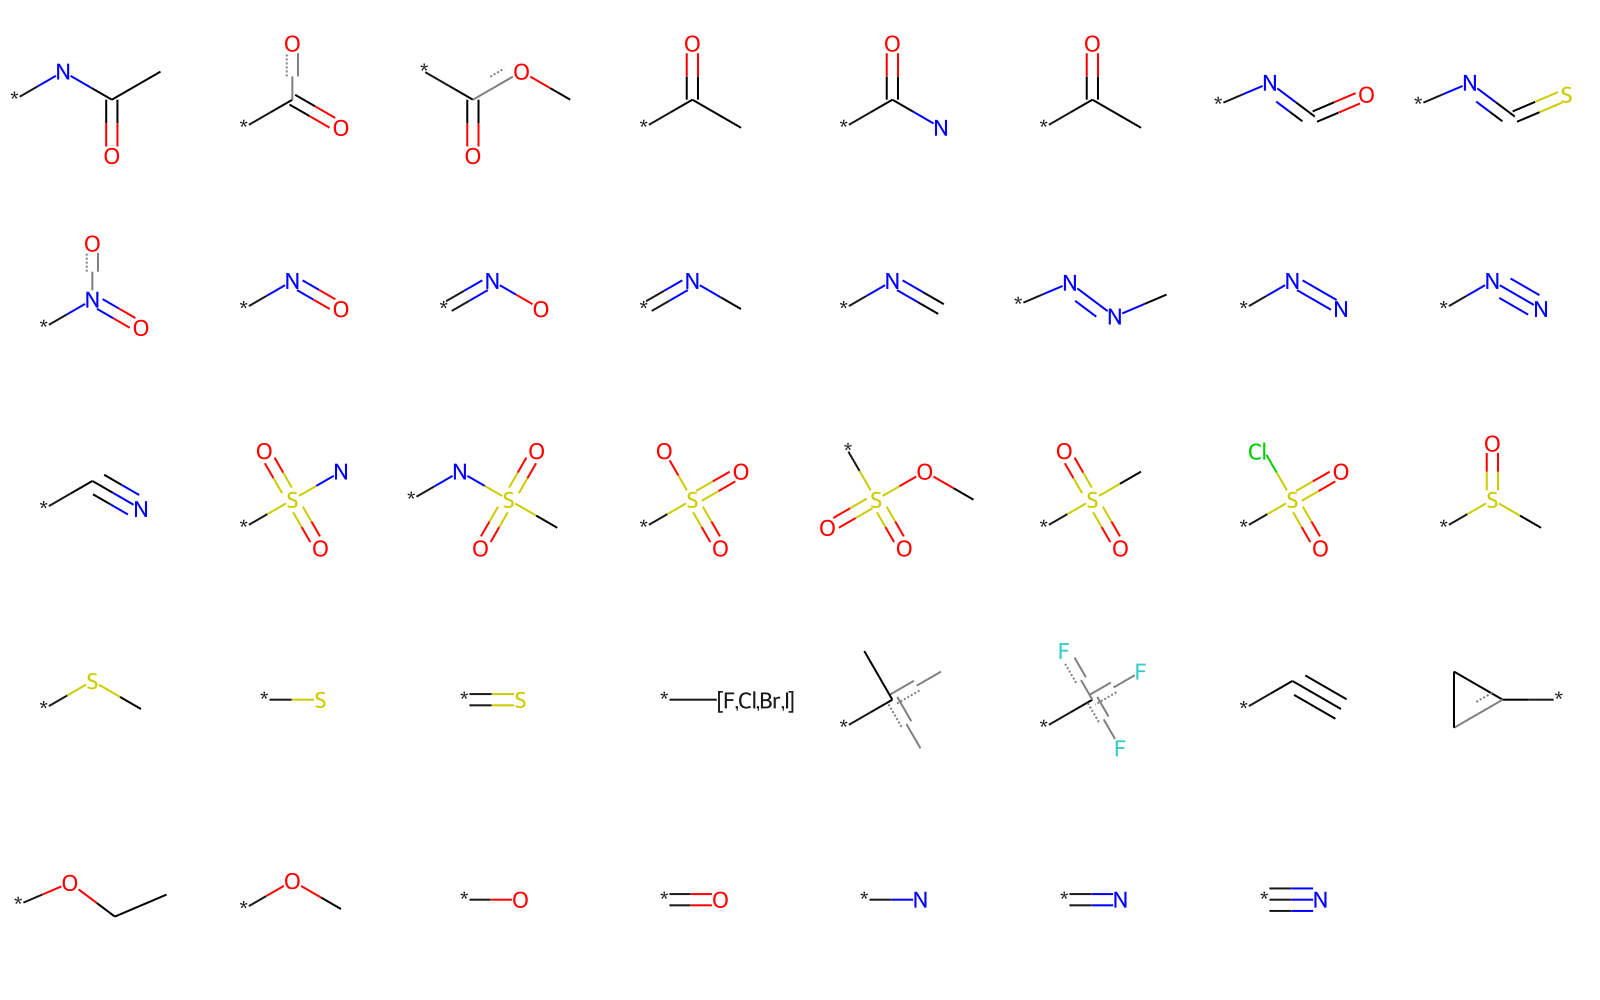

In [28]:
import os 
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig
from rdkit.Chem import Draw
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

# smi='C=CC(=O)N1CCC(CC1)C2CCNC3=C(C(=NN23)C4=CC=C(C=C4)OC5=CC=CC=C5)C(=O)N'
# m=Chem.MolFromSmiles(smi)
# feats = factory.GetFeaturesForMol(m)
# len(feats)
# for f in feats:
#     print(f.GetFamily(),f.GetType(),f.GetAtomIds())
fName=os.path.join(RDConfig.RDDataDir,'FunctionalGroups.txt')
from rdkit.Chem import FragmentCatalog
fparams = FragmentCatalog.FragCatParams(1,6,fName)
fparams.GetNumFuncGroups()
mols=[]
for i in range(fparams.GetNumFuncGroups()):
    mols.append(fparams.GetFuncGroup(i))
#print(mols[0].smiles())
Draw.MolsToGridImage(mols,molsPerRow=8)

In [29]:
fcat=FragmentCatalog.FragCatalog(fparams)
fcgen=FragmentCatalog.FragCatGenerator()
m = Chem.MolFromSmiles('Cc1ccc(C(=O)N2CCC(c3ccc(-c4cnn(C)c4)cc3)CC2)cc1NC(=O)c1ccc(NC(C)C)nc1')
reactant_1=Chem.MolFromSmiles("Cc1ccc(C(=O)N2CCC(c3ccc(-c4cnn(C)c4)cc3)CC2)cc1NC(=O)c1ccc(Cl)nc1")
reactant_2=Chem.MolFromSmiles("CC(C)N")
# fcgen.AddFragsFromMol(m,fcat)
# num_entries=fcat.GetNumEntries()
# print("matched the function group ids is",list(fcat.GetEntryFuncGroupIds(num_entries-1)))
fcgen.AddFragsFromMol(m,fcat)
num_entries=fcat.GetNumEntries()
print("matched the function group ids is",list(fcat.GetEntryFuncGroupIds(num_entries-1)))


matched the function group ids is []


In [30]:
fcat_1=FragmentCatalog.FragCatalog(fparams)
fcgen_1=FragmentCatalog.FragCatGenerator()
fcgen_1.AddFragsFromMol(reactant_1,fcat_1)
num_entries=fcat_1.GetNumEntries()
print("matched the function group ids is",list(fcat_1.GetEntryFuncGroupIds(num_entries-1)))
fcat_2=FragmentCatalog.FragCatalog(fparams)
fcgen_2=FragmentCatalog.FragCatGenerator()
fcgen_2.AddFragsFromMol(reactant_2,fcat_2)
num_entries=fcat_2.GetNumEntries()
print("matched the function group ids is",list(fcat_2.GetEntryFuncGroupIds(num_entries-1)))

matched the function group ids is [27]
matched the function group ids is [36]


name of group 28  -tBu
name of group 26  -X
name of group 35  -N
**
*C(C)(C)C
*N
Cc1ccc(C(=O)N2CCC(c3ccc(-c4cnn(C)c4)cc3)CC2)cc1NC(=O)c1ccc(NC(C)C)nc1
CC(C)N


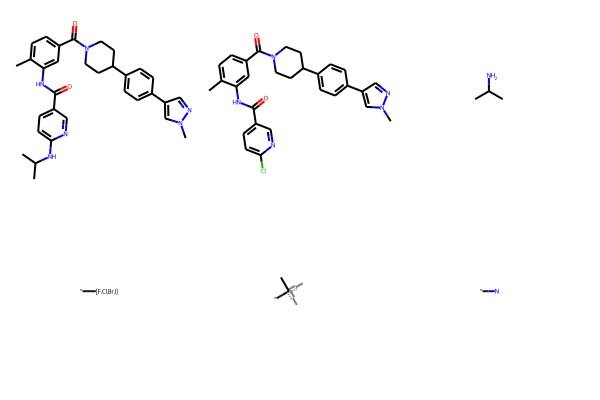

In [31]:
fg28=fparams.GetFuncGroup(28)
fg27=fparams.GetFuncGroup(27)
fg36=fparams.GetFuncGroup(36)
print("name of group 28 ",fg28.GetProp('_Name'))
print("name of group 26 ",fg27.GetProp('_Name'))
print("name of group 35 ",fg36.GetProp('_Name'))
print(Chem.MolToSmiles(fg27))
print(Chem.MolToSmiles(fg28))
print(Chem.MolToSmiles(fg36))
print(Chem.MolToSmiles(m))
print(Chem.MolToSmiles(reactant_2))
mols=[m,reactant_1,reactant_2,fg27,fg28,fg36]
Draw.MolsToGridImage(mols,molsPerRow=3)